# Analyze eCAVIAR results

In [1]:
library(tidyverse)
library(data.table)
library("ggsci")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
setwd("../out/")

In [3]:
eqtl <- read.table("eqtl_CLPP_sig.txt", head = T)
isoqtl <- read.table("isoqtl_CLPP_sig.txt", head = T)
sqtl <- fread("sqtl_CLPP_sig.txt", data.table = F)
tri_eqtl <- read.table("tri_eqtl.txt", head = T)
tri_isoqtl <- read.table("tri_isoqtl.txt", head = T)
tri_sqtl <- read.table("tri_sqtl.txt", head = T)

In [4]:
eqtl <- eqtl %>% 
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
eqtl$Annotation <- "eQTL"

In [5]:
isoqtl <- isoqtl %>%
    filter(V11 == "protein_coding") %>%
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
isoqtl$Annotation <- "isoQTL"

In [6]:
sqtl <- sqtl %>%
    unite("Gene_SNP", gene.y, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
sqtl$Annotation <- "sQTL"

In [7]:
tri_eqtl <- tri_eqtl %>%
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
tri_eqtl$Annotation <- "Tri-eQTL"

In [8]:
tri_isoqtl <- tri_isoqtl %>%
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
tri_isoqtl$Annotation <- "Tri-isoQTL"

In [10]:
gtf <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [11]:
tri_sqtl <- tri_sqtl %>% inner_join(gtf, by = c("gene.y" = "V12"))

In [12]:
tri_sqtl <- tri_sqtl %>%
    filter(V11 == "protein_coding") %>%
    unite("Gene_SNP", gene.y, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
tri_sqtl$Annotation <- "Tri-sQTL"

In [13]:
df <- rbind(eqtl, isoqtl, sqtl, tri_eqtl, tri_isoqtl, tri_sqtl)

In [14]:
dim(df)

[1] 90  5

In [15]:
head(df)

,Gene_SNP,CLPP,locus,gwas,Annotation
,<chr>,<dbl>,<int>,<chr>,<chr>
1,MST1R_rs2681780,0.0563520,19,ADHD_AUT_CC,eQTL
2,MST1R_rs9821675,0.0120462,19,ADHD_AUT_CC,eQTL
3,MST1R_rs1317154,0.0473051,19,ADHD_AUT_CC,eQTL
4,CAMKV_rs1317154,0.0111055,20,ADHD_CC,eQTL
5,MST1R_rs2681780,0.0557382,20,ADHD_CC,eQTL
6,MST1R_rs1317154,0.0720201,20,ADHD_CC,eQTL


In [44]:
table(df$gwas)


       ADHD ADHD_AUT_CC     ADHD_CC         AUT         xDx 
         27          33          19           8           3 

In [16]:
df %>% group_by(gwas) %>% summarise(num_loc = n_distinct(locus))

gwas,num_loc
<chr>,<int>
ADHD,4
ADHD_AUT_CC,3
ADHD_CC,3
AUT,2
xDx,2


In [17]:
all_loc <- read.table("../data/gwas_indexSNP.tsv", header = T)

In [18]:
head(all_loc)

,SNP,CHR,BP,GWAS,locus
,<chr>,<int>,<int>,<chr>,<int>
1,rs11210887,1,44076019,ADHD,1
2,rs11210887,1,44076019,ADHD_CC,2
3,rs11210887,1,44076019,ADHD_MDD_CC,3
4,rs17371903,1,44070691,ADHD_AUT_CC,4
5,rs12123815,1,96944183,ADHD_CC,5
6,rs34547386,1,96954394,ADHD_MDD_CC,6


In [29]:
df1 <- all_loc %>% group_by(GWAS) %>% count()

In [30]:
df1$coloc <- 0
df1[df1$GWAS == 'ADHD','coloc'] <- 4
df1[df1$GWAS == 'ADHD_AUT_CC','coloc'] <- 3
df1[df1$GWAS == 'ADHD_CC','coloc'] <- 3
df1[df1$GWAS == 'AUT','coloc'] <- 2
df1[df1$GWAS == 'xDx','coloc'] <- 2

In [36]:
df1 <- melt(df1)

Warning message in melt(df1):
“The melt generic in data.table has been passed a grouped_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df1). In the next version, this warning will become an error.”
Using GWAS as id variables



In [40]:
head(df1)

,GWAS,variable,value
,<chr>,<fct>,<dbl>
1,ADHD,n,16
2,ADHD_ANO_CC,n,1
3,ADHD_AUT_CC,n,7
4,ADHD_CC,n,9
5,ADHD_MDD_CC,n,6
6,ANO_MDD_CC,n,1


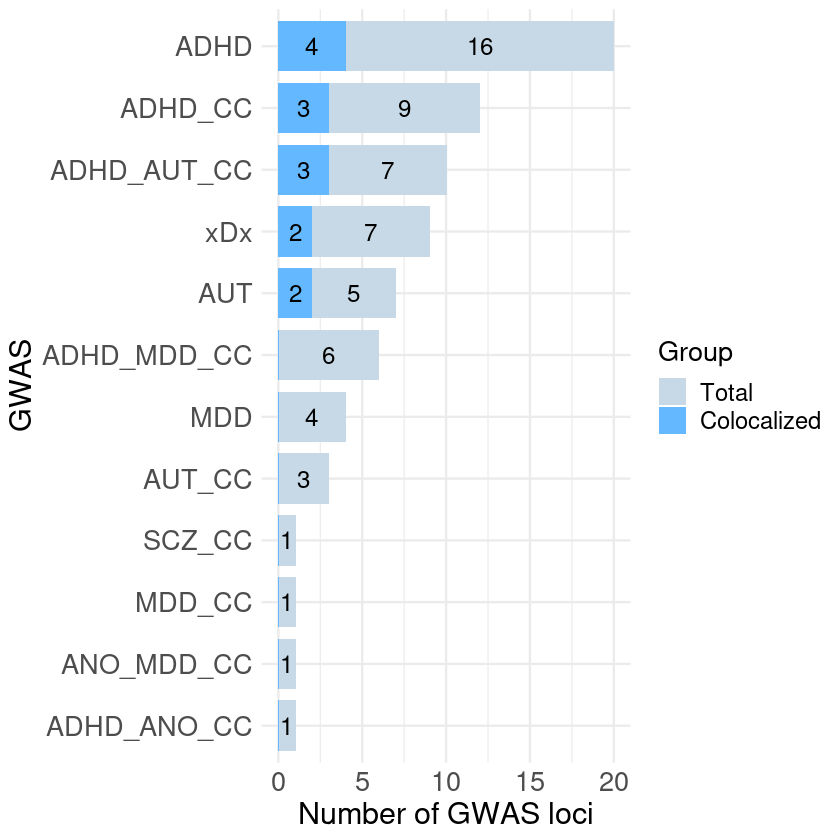

In [89]:
ggplot(df1, aes(x = value, y = reorder(GWAS, value), fill = variable)) +
    geom_bar(position = "stack", stat = "identity", width = 0.8) +
    geom_text(aes(label = ifelse(value == 0, "", value)), 
              position = position_stack(vjust = 0.5), 
              size = 5) +
    labs(x = "Number of GWAS loci", y = "GWAS", fill = "Group") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    xlim(0, 20) +
    scale_fill_manual(values = c("n" = "#C7D9E6", "coloc" = "steelblue1"), labels = c("Total", "Colocalized"))

In [90]:
ggsave("../figures/num_locus_new.pdf", height = 6, width = 6)

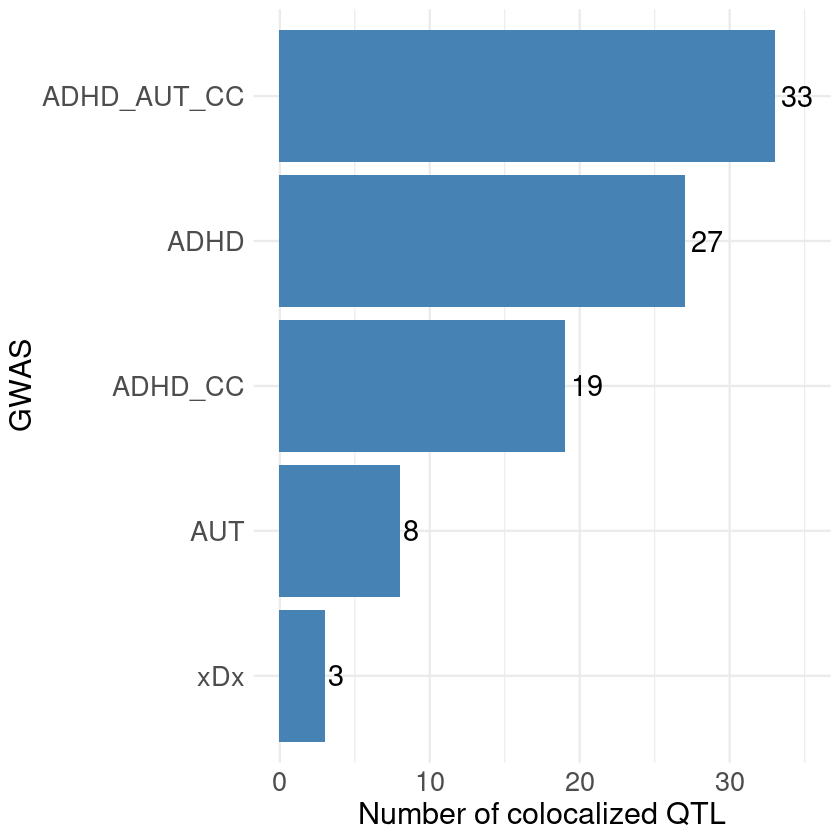

In [75]:
ggplot(df %>% count(gwas), aes(x = n, y = reorder(gwas, n))) +
    geom_bar(stat = "identity", fill = "steelblue") +
    geom_text(aes(label = n), hjust = -0.2, size = 6) +
    labs(x = "Number of colocalized QTL", y = "GWAS") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18)) +
    xlim(0, 35)
ggsave("../figures/num_qtl.pdf", height = 6, width = 6)

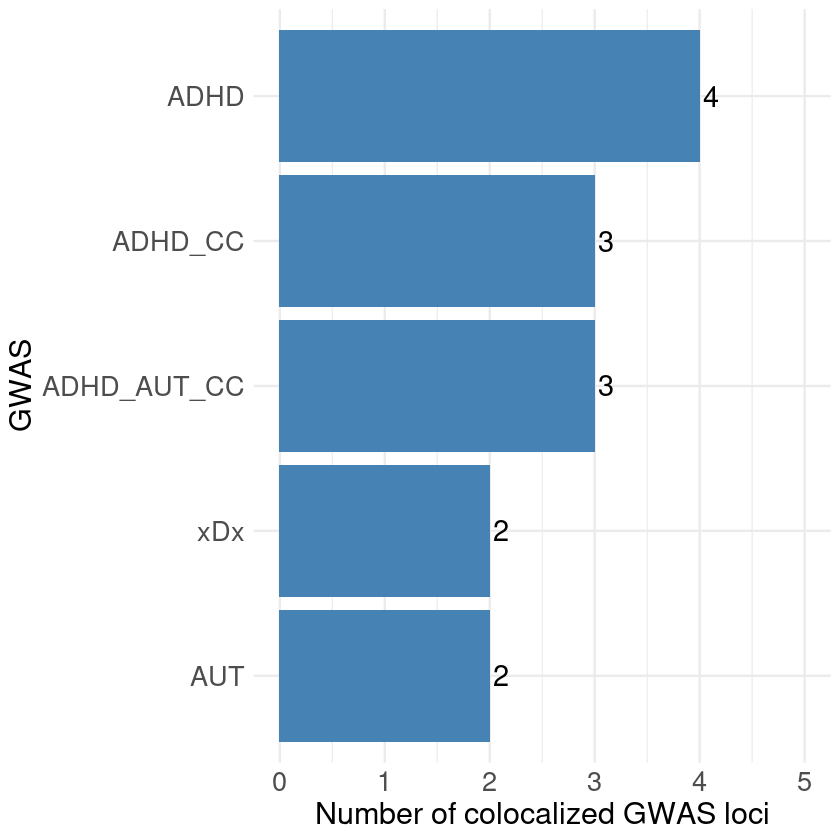

In [76]:
ggplot(df %>% group_by(gwas) %>% summarise(num_loc = n_distinct(locus)),
       aes(x = num_loc, y = reorder(gwas, num_loc))) +
    geom_bar(stat = "identity", fill = "steelblue") +
    geom_text(aes(label = num_loc), hjust = -0.2, size = 6) +
    labs(x = "Number of colocalized GWAS loci", y = "GWAS") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18)) +
    xlim(0, 5)
ggsave("../figures/num_locus.pdf", height = 6, width = 6)

In [77]:
adhd <- df %>% filter(gwas == "ADHD")
dim(adhd)

[1] 27  5

In [81]:
# same Gene_SNP, keep the annot with highest CLPP
adhd <- adhd %>% arrange(CLPP)
adhd <- adhd[!duplicated(adhd$Gene_SNP),]

In [83]:
df_order <- adhd %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)
# df_order$Gene_SNP
# df_order$locus

In [85]:
table(adhd$locus)


 1 21 56 60 
 1 15  1  3 

[1] "#1F77B4CC" "#FF7F0ECC" "#2CA02CCC" "#D62728CC" "#9467BDCC" "#8C564BCC"
[7] "#E377C2CC" "#7F7F7FCC" "#BCBD22CC"

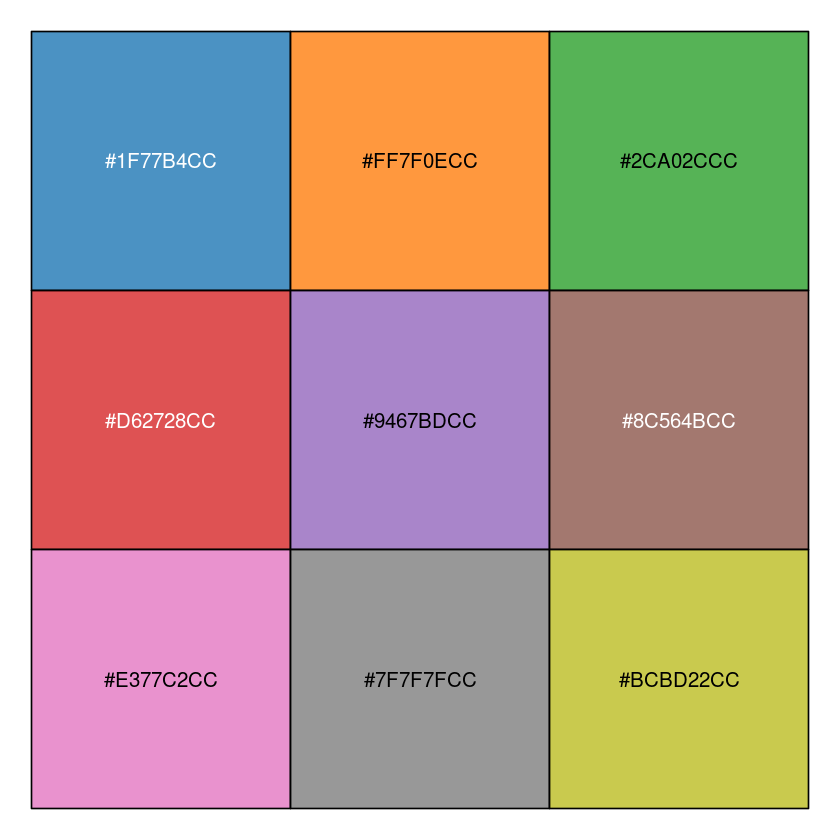

In [115]:
mypal <- pal_d3(alpha = .8)(9)
mypal

library("scales")
show_col(mypal)

In [116]:
mypal <- c("eQTL" = "#1F77B4CC", "isoQTL" = "#FF7F0ECC", "sQTL" = "#2CA02CCC",
            "Tri-eQTL" = '#D62728CC', "Tri-isoQTL" = '#9467BDCC', "Tri-sQTL" = '#BCBD22CC')

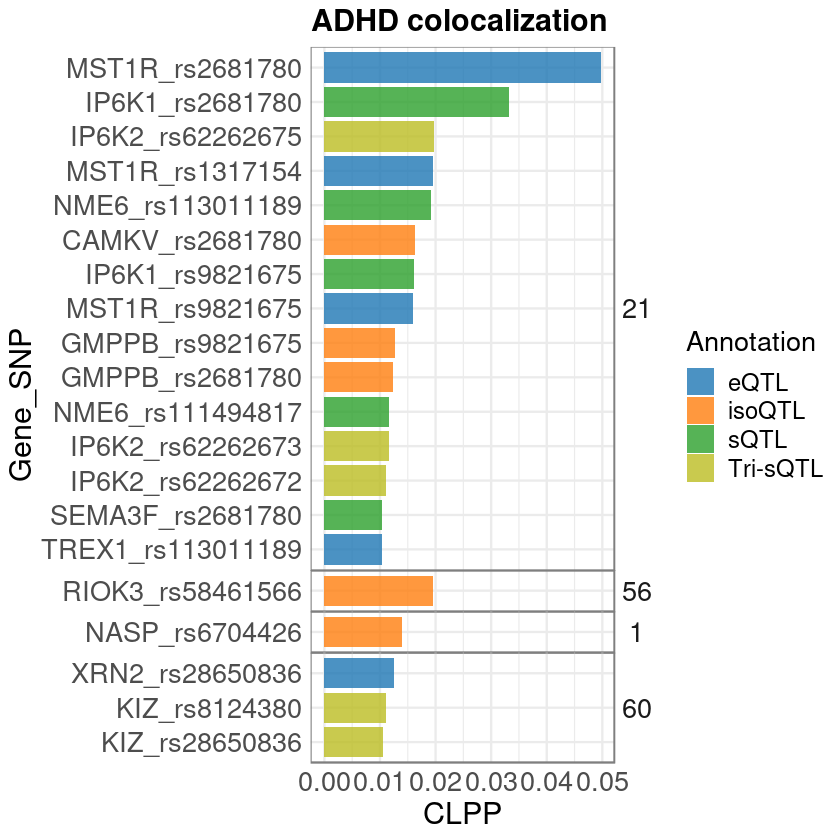

In [118]:
ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [119]:
ggsave("../figures/ADHD.pdf", height = 10, width = 8)

[1] 33  5


 4 19 34 
 3 26  1 

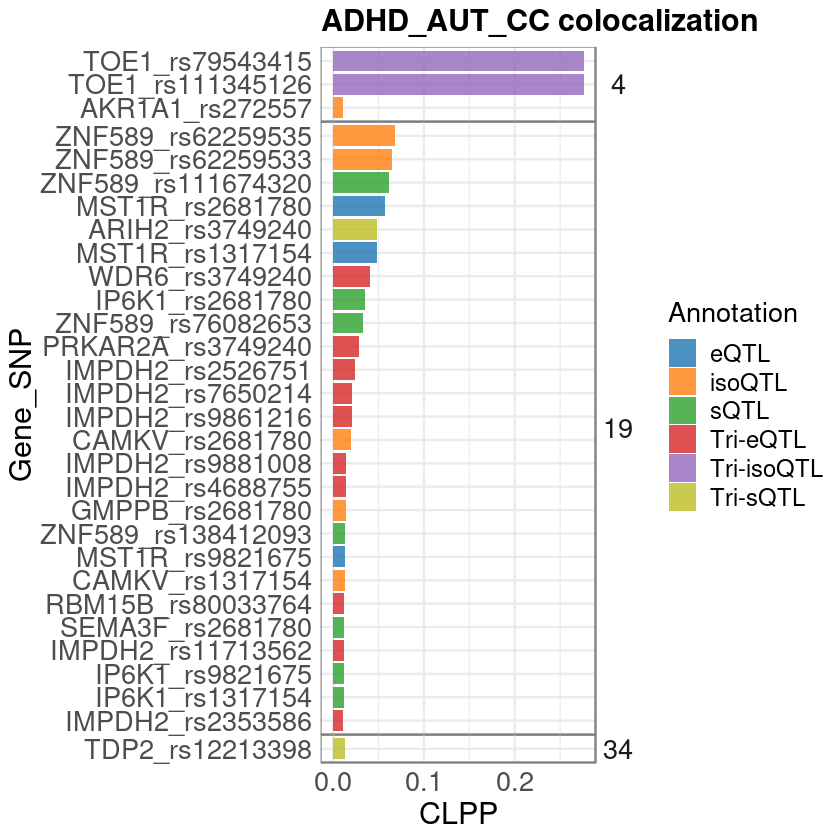

In [120]:
ADHD_AUT_CC <- df %>% filter(gwas == "ADHD_AUT_CC")
dim(ADHD_AUT_CC)

ADHD_AUT_CC <- ADHD_AUT_CC %>% arrange(CLPP)
ADHD_AUT_CC <- ADHD_AUT_CC[!duplicated(ADHD_AUT_CC$Gene_SNP),]

df_order <- ADHD_AUT_CC %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)

table(ADHD_AUT_CC$locus)

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD_AUT_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [121]:
ggsave("../figures/ADHD_AUT_CC.pdf", height = 10, width = 8)

[1] 19  5


 2 15 20 
 2  1 13 

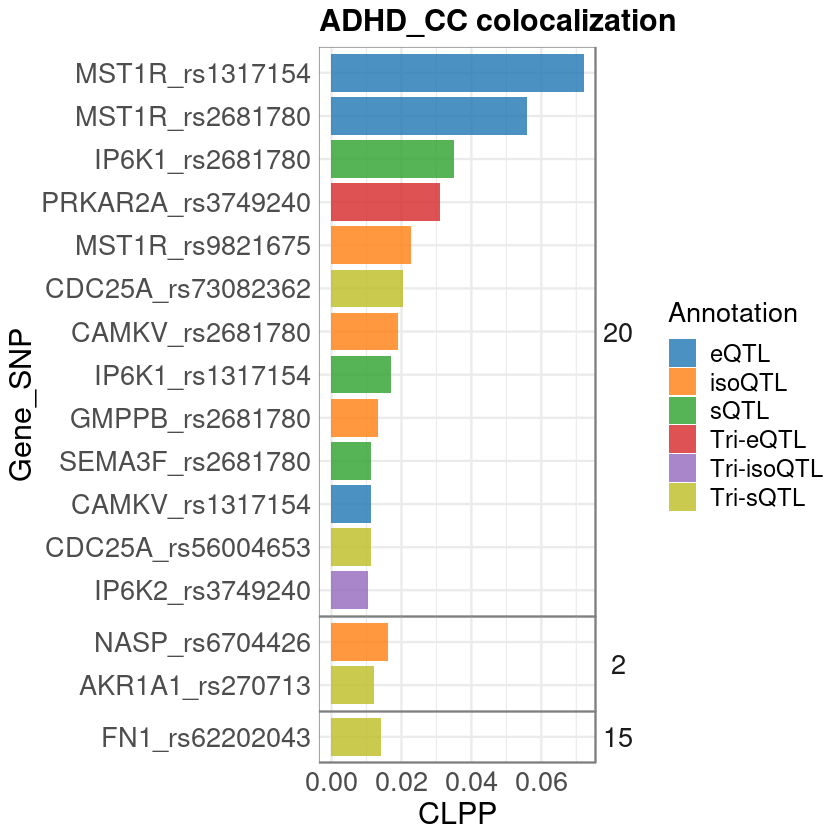

In [123]:
ADHD_CC <- df %>% filter(gwas == "ADHD_CC")
dim(ADHD_CC)

ADHD_CC <- ADHD_CC %>% arrange(CLPP)
ADHD_CC <- ADHD_CC[!duplicated(ADHD_CC$Gene_SNP),]

df_order <- ADHD_CC %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)

table(ADHD_CC$locus)

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

ggsave("../figures/ADHD_CC.pdf", height = 10, width = 8)

[1] 8 5


25 41 
 3  4 

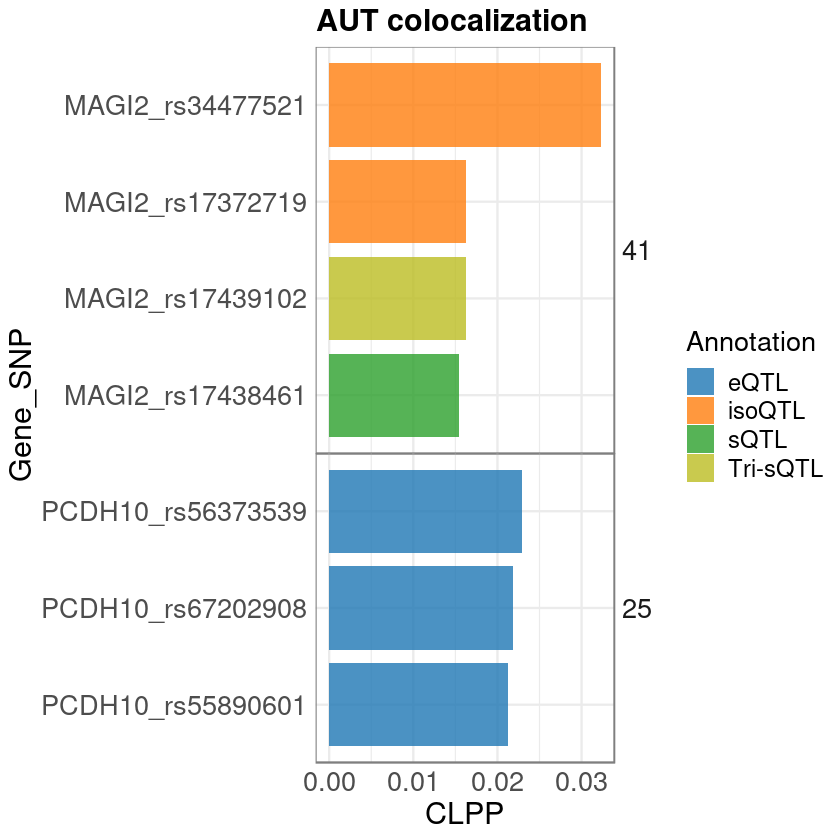

In [124]:
AUT <- df %>% filter(gwas == "AUT")
dim(AUT)

AUT <- AUT %>% arrange(CLPP)
AUT <- AUT[!duplicated(AUT$Gene_SNP),]

df_order <- AUT %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)

table(AUT$locus)

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "AUT colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

ggsave("../figures/AUT.pdf", height = 10, width = 8)

[1] 3 5


50 59 
 1  1 

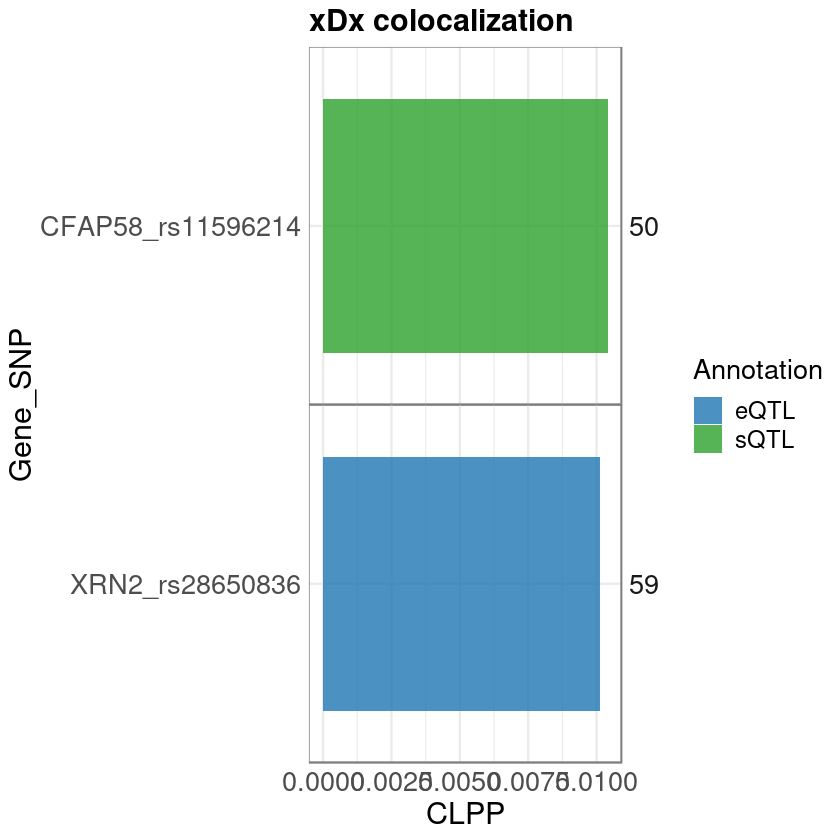

In [128]:
xDx <- df %>% filter(gwas == "xDx")
dim(xDx)

xDx <- xDx %>% arrange(CLPP)
xDx <- xDx[!duplicated(xDx$Gene_SNP),]

df_order <- xDx %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)

table(xDx$locus)

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "xDx colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

ggsave("../figures/xDx.pdf", height = 10, width = 8)